# Q1

In [8]:
from nltk.corpus import stopwords
import statistics
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import os
import matplotlib.pyplot as plt 
import pickle
import re
from natsort import natsorted
import string
import collections
from num2words import num2words
import math
import numpy as np
import numpy as np
np_load_old = np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

In [9]:
def readFile(filename):
    file = open(filename, 'r',encoding ="ascii", errors ="surrogateescape")
    document=file.read()
    file.close()
    #print(document)
    #document=remove_header_footer(document)
    #print(document)
    return document
def whitespaceRemoval(document):
    return document.strip()
def stopWordsRemoval(tokens):
    stop_words=set(stopwords.words('english'))
    token_list=[token for token in tokens if not token in stop_words]
    return token_list
def puntuationsRemoval(document):
    table = str.maketrans('', '', string.punctuation)
    document = document.translate(table)
    return document
def tokenization(document):
    token_list=word_tokenize(document)
    return token_list
def lowerCase(tokens):
    token_list=[token.lower() for token in tokens]
    return token_list
def porterStemmer(tokens):
    ps=PorterStemmer()
    token_list=[ps.stem(token) for token in tokens]
    return token_list
def numbersremoval(document):
    document=re.sub(r'\d+','',document)
    return document
def numbersToWords(document):
    temp = re.findall(r'\d+', document) 
    res = list(map(int, temp)) 
    s=""
    for i in res:
        s=s+num2words(i)+" "
    return s;

In [10]:
#computing static score to lie between 0 to 1
def convertStaticScore(score):
    OldMin=0
    OldMax=49
    NewMax=1
    NewMin=0
    NewValue = (((score - OldMin) * (NewMax - NewMin)) / (OldMax - OldMin)) + NewMin
    return round(NewValue,6)

In [11]:
f = open("file.txt", "r")
static_scores=[]
for x in f:
    temp = [int(x) for x in x.split(" ")]
    temp[1]=convertStaticScore(temp[1])
    static_scores.append(temp)

In [12]:
def documentToTerms(document):
    token_list=[]
    #print("Number To words Convertion")
    string_of_numbers=numbersToWords(document)
    #print(string_of_numbers)
    document=document+" "+string_of_numbers
    #print(document)
    #Whitespace removal
    #print("Whitespace removal")
    document=whitespaceRemoval(document)
    #Punctuations Removal
    #print("Puntuations removal")
    document=puntuationsRemoval(document)
    #removing numbers
    document=numbersremoval(document)
    #print("Removal of Numbers")
    #print(document)
    #tokenization
    #print("Tokenization")
    token_list=tokenization(document)
#     #stop words removal
    #print("Stop Words Removal")
    token_list=stopWordsRemoval(token_list)
    #print(token_list)
    #lower Case conversion
    #print("LowerCase Conversion")
    token_list=lowerCase(token_list)
    #print(token_list)
    #stemming
    #print("Stemming")
    token_list=porterStemmer(token_list)
    #print(token_list)
    return token_list

In [13]:
#Buidling inverted index based on static ordering
def invertedIndex(terms,document_id,gd_score):
    for term in terms:
        if term in index:
            if(document_id in index[term][1]):
                index[term][1][document_id][0]+=1
            else:
                index[term][0]+=1
                index[term][1][document_id]=[]
                index[term][1][document_id].append(1)
                index[term][1][document_id].append(gd_score)
        else:
            index[term]=[]
            index[term].append(1)
            index[term].append({})
            index[term][1][document_id]=[]
            index[term][1][document_id].append(1)
            index[term][1][document_id].append(gd_score)

In [14]:
folders=natsorted(os.listdir("20_newsgroups/"))
#folders=['alt.atheism']
index={}
no_of_documents=0
for folder in folders:
    fpath='20_newsgroups/'+ folder
    if(os.path.isdir(fpath)):
        file_names=natsorted(os.listdir("20_newsgroups/" + folder))
        #file_names=["39676","39677"]
        for file_name in file_names:
            #reading the document
            document=readFile("20_newsgroups/" + folder+"/"+file_name)
            #print(document)
            #preprocessing from the document
            terms=list(documentToTerms(document))
            #print(type(terms))
            #inverted index prepration
            #print("Inverted Index Formation")
            static_scores[no_of_documents].append(folder)
            static_scores[no_of_documents].append(file_name)
            invertedIndex(terms,static_scores[no_of_documents][0]-1,static_scores[no_of_documents][1]) 
            no_of_documents+=1
for key,value in index.items():
    index[key]={k: v for k, v in sorted(value[1].items(), key=lambda item: item[1][1],reverse=True)}

with open('index.pickle', 'wb') as handle:
    pickle.dump(index, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
print(index)

In [15]:
with open('index.pickle', 'rb') as handle:
    index = pickle.load(handle)
print("Inverted Index Formation")
print(type(index))
#print(index)

Inverted Index Formation
<class 'dict'>


In [16]:
def highLowLists(key,value,r):
    temp={k: v for k, v in sorted(index[key].items(), key=lambda item: item[1][0],reverse=True)}
    if(len(index[key])<r):
        highList[key]=dict(list(temp.items())[0:len(index[key])])
        return
    highList[key]=dict(list(temp.items())[0:r])
    lowList[key]=dict(list(temp.items())[r:])

In [17]:
def rcalulationMean(): # mean of the length of the posting list
    r=0
    for key,value in index.items():
        r+=len(index[key])
    print("Length if mean is taken",int(r/len(index)))
    return r

In [18]:
def rcalulationMedian(): #meadian of the length of indexex
    r=[]
    for key,value in index.items():
        r.append(len(index[key]))
    print("max length of posting:",max(r))
    print("min length of posting:",min(r))
    print("Length if mean is taken",statistics.median(r))
    return int(statistics.median(r))

In [19]:
def rcalulationMeanMedian(): # half the length of the posting list means
    r=0
    for key,value in index.items():
        r+=len(index[key])/2
    print("Length if mean is taken",int(r/len(index)))
    return r

In [20]:
#dividing into high and lowlist based on r
highList={}
lowList={}
#r=rcalulationMean()
#r=rcalulationMedian()
#r=rcalulationMeanMedian()
for key,value in index.items():
    r=int(math.sqrt(len(index[key]))) #Point 5
    #r=int(len(index[key])/2) #Point 4
    highLowLists(key,value,r)
for key,value in highList.items():
    highList[key]={k: v for k, v in sorted(value.items(), key=lambda item: item[1][1],reverse=True)}
for key,value in lowList.items():
    lowList[key]={k: v for k, v in sorted(value.items(), key=lambda item: item[1][1],reverse=True)}
print("HighList")
#print(lowList)

HighList


In [23]:
def lengthDocuments():
    length=([0 for i in range(no_of_documents)])
    for term,posting in index.items():
        idf=math.log(no_of_documents/len(index[term]))
        for document,frequency in posting.items():
            tf=1+math.log(frequency[0]) if frequency[0]!=0 else 0
            length[document]+=round(tf*idf*tf*idf,6)
    return length

In [25]:
length=lengthDocuments()
length=([round(math.sqrt(x),6) for x in length])
#print(length)

In [26]:
def ltc(listitems):
    union_file={}
    for term in query:
        if term in listitems:
            #print(term)
            idf=math.log(no_of_documents/len(index[term]))
            for document,frequency in listitems[term].items():
                #print(frequency," jkjj",document)
                tf=1+math.log(frequency[0]) if frequency[0]!=0 else 0
                gd=frequency[1]
                if(not document in union_file):
                    union_file[document]=round(tf*idf,4)
                else:
                    union_file[document]+=round(tf*idf,4)#tf*idf
                #print("score:",score)
    #print(score[1][0])
    #print(length[i])
    for key,value in union_file.items():
        union_file[key]=round((union_file[key]/length[key])+static_scores[key][1],6)
    #print(score_res)
    return union_file

In [27]:
# def display(score,k):
#     #print("Scores:",score)
#     if k<=len(score):
#         print("Top "+str(k)+" items are:")
#         temp=list(score.keys())[0:k]
#         print(["Folder_name: "+static_scores[i][2]+"  File_name: "+static_scores[i][3] for i in temp])
#     else:
#         print("Top ",len(score)," items are:")
#         temp=list(score.keys())[0:len(score)]
#         print(["Folder_name: "+static_scores[i][2]+"  File_name: "+static_scores[i][3] for i in temp])

In [28]:
def display(score,k):
    #print("Scores:",score)
    if k<=len(score):
        print("Items are:")
        temp=list(score.keys())[0:k]
        print([str(static_scores[i][2])+" "+str(static_scores[i][3]) for i in temp])
    else:
        print("Items are:")
        temp=list(score.keys())[0:len(score)]
        print([str(static_scores[i][2])+"  "+str(static_scores[i][3]) for i in temp])

In [29]:
# query="color graphs"
# query=documentToTerms(query)
# print(query)
# k=20
# score_high_union=ltc(highList)
# score_high_union={k: v for k, v in sorted(score_high_union.items(), key=lambda item: item[1],reverse=True)}
# print("length of high union:",len(score_high_union))
# print("From High List")
# display(score_high_union,k)
# if(len(score_high_union)<k):
#     score_low_union=ltc(lowList)
#     score_low_union={k: v for k, v in sorted(score_low_union.items(), key=lambda item: item[1],reverse=True)}
#     print("length of low union:",len(score_low_union))
#     print("From Low List")
#     display(score_low_union,k-len(score_high_union))

In [30]:
query="operational magazine"
query=documentToTerms(query)
print(query)
k=30
score_high_union=ltc(highList)
score_high_union={k: v for k, v in sorted(score_high_union.items(), key=lambda item: item[1],reverse=True)}
#print("length of high union:",len(score_high_union))
print("From High List")
display(score_high_union,k)
if(len(score_high_union)<k):
    score_low_union=ltc(lowList)
    score_low_union={k: v for k, v in sorted(score_low_union.items(), key=lambda item: item[1],reverse=True)}
    #print("length of low union:",len(score_low_union))
    print("From Low List")
    display(score_low_union,k-len(score_high_union))

['oper', 'magazin']
From High List
Items are:
['talk.politics.guns 54211', 'rec.autos 102770', 'comp.graphics 38853', 'comp.sys.mac.hardware 52098', 'sci.space 61293', 'sci.space 61253', 'talk.politics.guns 54948', 'rec.autos 101666', 'talk.politics.misc 178569', 'talk.politics.mideast 77257', 'sci.electronics 53996', 'talk.politics.mideast 75421', 'talk.politics.misc 178908', 'comp.windows.x 66424', 'talk.politics.mideast 76133', 'misc.forsale 74791', 'talk.politics.mideast 76315', 'comp.os.ms-windows.misc 9741', 'talk.politics.misc 178325', 'talk.politics.misc 178894', 'comp.windows.x 68012', 'talk.politics.guns 54508', 'comp.sys.ibm.pc.hardware 58862', 'comp.graphics 38778', 'sci.space 59850', 'misc.forsale 75946', 'talk.politics.guns 54684', 'sci.electronics 53834', 'sci.crypt 15176', 'sci.crypt 15177']


# Q2

In [31]:
import pandas as pd

In [32]:
data = pd.read_csv('IR-assignment-3-data.txt',sep="\s|:", header=None, engine="python")
data=data.iloc[::,::2]
my_cols=['relavance','Qid']
my_cols+=([i for i in range(1,137)])
data.columns=my_cols
print("Length of the data:",len(data))

Length of the data: 239093


# Part 1

In [33]:
data_1_2=data.loc[data['Qid'] == 4]
print("Length of QID :",len(data_1_2))
data_1=data_1_2.sort_values('relavance',ascending=False)
data_1.to_csv(r'Data_1.csv')

Length of QID : 103


In [34]:
temp=data_1_2.relavance.unique()
unique_relevance={}
for i in temp:
    unique_relevance[i]=data_1_2.relavance.value_counts()[i]
print(str(unique_relevance)) # count of each relevance score

{0: 59, 1: 26, 3: 1, 2: 17}


In [35]:
def nPr(n,r):
    npr = math.factorial(n)/math.factorial(n-r)
    return npr

In [36]:
sum_r=1
sum_nr=0
sum_total=0
for key,value in unique_relevance.items():
    if(key==0):
        for i in range(0,value+1):
            sum_nr+=nPr(value,i)
    else:
        sum_r*=math.factorial(value)
#print("sum_nr:",int(sum_nr))
# print("sum_r:",sum_r)
print("Number of files possible are:",int(sum_nr*sum_r))

Number of files possible are: 54076132421510975524680685859311628107562997134915673273341926613583991182815614384364378135636351607202387088459526307840


# Part 2

In [37]:
#calculating DCG
def dcgAt(t):
    temp=data_1_2.iloc[0:t,0:1]
    temp['log2(i+1)']=[math.log(i+1,2) for i in range(1, len(temp)+1)]
    temp['rel_i/log2(i+1)']=[temp.iloc[i]['relavance']/temp.iloc[i]['log2(i+1)'] for i in range(0, len(temp))]
    #print(temp)
    DCG=temp['rel_i/log2(i+1)'].sum() 
    print("DCG at ",t," is:",DCG)
    return DCG

In [38]:
def iDCGAt(t):
    temp=data_1.iloc[0:t,0:1]
    temp['log2(i+1)']=[math.log(i+1,2) for i in range(1, len(temp)+1)]
    temp['rel_i/log2(i+1)']=[temp.iloc[i]['relavance']/temp.iloc[i]['log2(i+1)'] for i in range(0, len(temp))]
    #print(temp)
    iDCG=temp['rel_i/log2(i+1)'].sum() 
    print("iDCG at ",t," is:",iDCG)
    return iDCG

In [39]:
t=50
DCG=dcgAt(t)
iDCG=iDCGAt(t)
nDCG=DCG/iDCG
print("nDCG at ",t," is:",nDCG)
t=len(data_1_2)
DCG=dcgAt(t)
iDCG=iDCGAt(t)
nDCG=DCG/iDCG
print("nDCG at ",t," is:",nDCG)

DCG at  50  is: 7.19450227631398
iDCG at  50  is: 19.407247618668023
nDCG at  50  is: 0.37071213897397365
DCG at  103  is: 12.337484420604598
iDCG at  103  is: 19.407247618668023
nDCG at  103  is: 0.6357153091990773


# Part 3

In [40]:
data_3=pd.DataFrame(data_1_2.iloc[:,0])
data_3['75']=data_1_2.iloc[:,76]
data_3=data_3.sort_values('75',ascending=False)

In [41]:
def plotting(x,y):
    plt.plot(x, y) 
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()

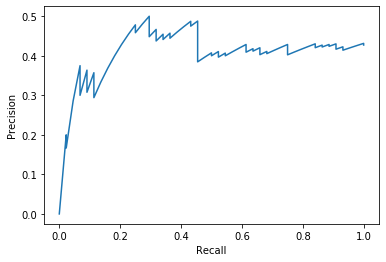

In [43]:
r=len(data_3)-data_3.relavance.value_counts()[0]
recall=[]
precision=[]
temp=0
for i in range(0,len(data_3)):
    if(data_3['relavance'][i]!=0):
        temp+=1
    precision.append(temp/(i+1))
    recall.append(temp/r)
plotting(recall,precision)
# print("Precision")
# print(precision)
# print("Recall")
# print(recall)
